In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

#Upload the dataset in Colab
uploaded = files.upload()

#download the csv file from the link : https://www.kaggle.com/datasets/atharvasoundankar/chocolate-sales/data


Saving Chocolate Sales.csv to Chocolate Sales (3).csv


In [ ]:
# Load the dataset (replace 'Chocolate Sales.csv' with your filename)
data = pd.read_csv(next(iter(uploaded.keys())))  # Auto-detects uploaded file
print("Data loaded successfully!")
print(data.head())

Data loaded successfully!
     Sales Person    Country              Product       Date    Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco  04-Jan-22   $5,320    
1     Van Tuxwell      India        85% Dark Bars  01-Aug-22   $7,896    
2    Gigi Bohling      India  Peanut Butter Cubes  07-Jul-22   $4,501    
3    Jan Morforth  Australia  Peanut Butter Cubes  27-Apr-22  $12,726    
4  Jehu Rudeforth         UK  Peanut Butter Cubes  24-Feb-22  $13,685    

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184  


In [ ]:
# Data Cleaning
data['Amount'] = data['Amount'].str.replace('$', '').str.replace(',', '').astype(float)
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)  # Handles '04-Jan-22' format
print("\nData after cleaning:")
print(data.info())


Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   float64       
 5   Boxes Shipped  1094 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 51.4+ KB
None


<ipython-input-12-da4510a3ecab>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)  # Handles '04-Jan-22' format


In [ ]:
# EDA: Basic Statistics
print("\nBasic Statistics:")
print(data.describe())


Basic Statistics:
                                Date        Amount  Boxes Shipped
count                           1094   1094.000000    1094.000000
mean   2022-05-03 09:04:56.160877568   5652.308044     161.797989
min              2022-01-03 00:00:00      7.000000       1.000000
25%              2022-03-02 00:00:00   2390.500000      70.000000
50%              2022-05-11 00:00:00   4868.500000     135.000000
75%              2022-07-04 00:00:00   8027.250000     228.750000
max              2022-08-31 00:00:00  22050.000000     709.000000
std                              NaN   4102.442014     121.544145


In [ ]:
# Visualizations
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Amount Distribution')

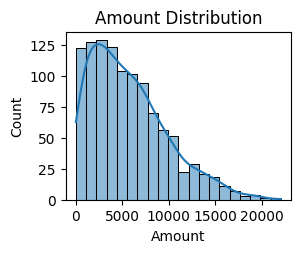

In [ ]:
#  Distribution of Amount
plt.subplot(2, 2, 1)
sns.histplot(data["Amount"], bins=20, kde=True)
plt.title("Amount Distribution")

Text(0.5, 1.0, 'Top 5 Products by Revenue')

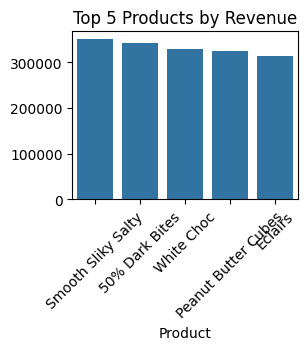

In [ ]:
# Top 5 Products by Revenue
plt.subplot(2, 2, 2)
top_products = data.groupby('Product')['Amount'].sum().nlargest(5)
sns.barplot(x=top_products.index, y=top_products.values)
plt.xticks(rotation=45)
plt.title("Top 5 Products by Revenue")

Top 10 shipped products:
Product
50% Dark Bites          9792
Smooth Sliky Salty      8810
Eclairs                 8757
Caramel Stuffed Bars    8717
Spicy Special Slims     8685
Name: Boxes Shipped, dtype: int64


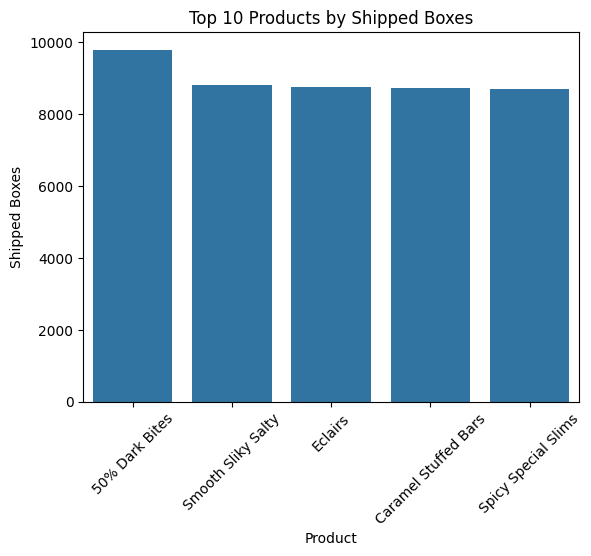

In [ ]:
# Top 10 products by shipped boxes
sales_product_trend = data.groupby('Product')['Boxes Shipped'].sum().sort_values(ascending=False).head(5)
print(f'Top 10 shipped products:\n{sales_product_trend}')
sns.barplot(x=sales_product_trend.index, y=sales_product_trend.values)
plt.xlabel('Product')
plt.ylabel('Shipped Boxes')
plt.title('Top 10 Products by Shipped Boxes')
plt.xticks(rotation=45)
plt.show()

less 5 products by revenue:
Product
70% Dark Bites          211610.0
Caramel Stuffed Bars    231588.0
Choco Coated Almonds    241486.0
Baker's Choco Chips     249613.0
Orange Choco            256144.0
Name: Amount, dtype: float64


([0, 1, 2, 3, 4],
 [Text(0, 0, '70% Dark Bites'),
  Text(1, 0, 'Caramel Stuffed Bars'),
  Text(2, 0, 'Choco Coated Almonds'),
  Text(3, 0, "Baker's Choco Chips"),
  Text(4, 0, 'Orange Choco')])

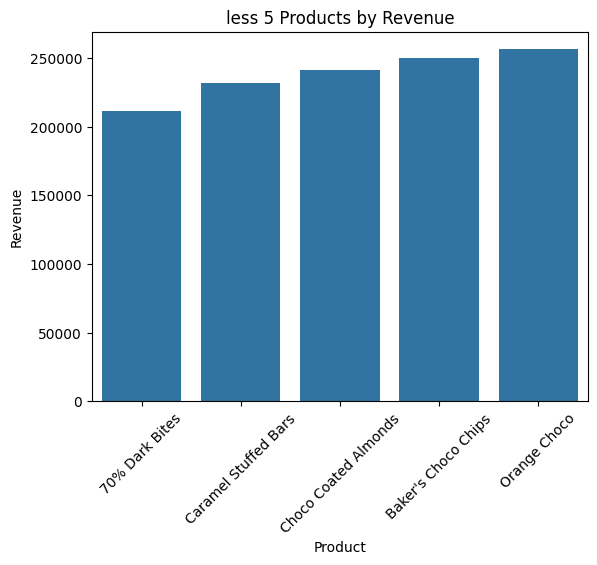

In [ ]:
#less 5 products by revenue
sales_product_revenue = data.groupby('Product')['Amount'].sum().sort_values(ascending=True).head(5)
print(f'less 5 products by revenue:\n{sales_product_revenue}')
sns.barplot(x=sales_product_revenue.index, y=sales_product_revenue.values)
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.title('less 5 Products by Revenue')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Sales Revenue Over Time')

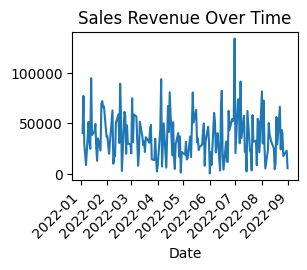

In [ ]:
# Sales Revenue Over Time
plt.subplot(2, 2, 3)
data.groupby('Date')['Amount'].sum().plot()
plt.xticks(rotation=45)
plt.title("Sales Revenue Over Time")

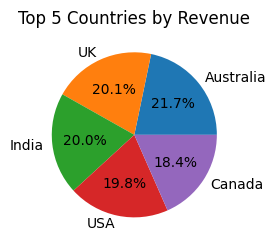

In [ ]:
# Top Countries by Revenue (Pie Chart)
plt.subplot(2, 2, 4)
top_countries = data.groupby('Country')['Amount'].sum().nlargest(5)
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%')
plt.title("Top 5 Countries by Revenue")

plt.tight_layout()
plt.show()

Top 5 countries by shipped boxes:
Country
Australia    32647
Canada       31221
UK           30265
India        29470
USA          26824
Name: Boxes Shipped, dtype: int64


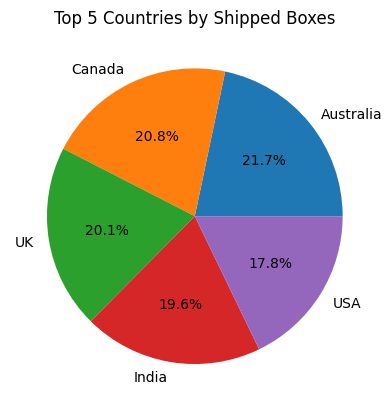

In [ ]:
# Top 5 countries shipped boxes
country_shipped_boxes = data.groupby('Country')['Boxes Shipped'].sum().sort_values(ascending=False).head(5)
print(f'Top 5 countries by shipped boxes:\n{country_shipped_boxes}')
plt.pie(country_shipped_boxes, labels=country_shipped_boxes.index, autopct='%1.1f%%')
plt.title('Top 5 Countries by Shipped Boxes')
plt.show()

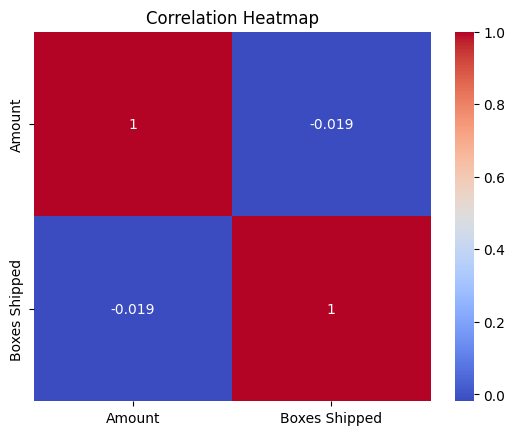

In [ ]:
# Correlation Heatmap (only numeric columns)
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()